In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thanjavur-dataset-new/updated_dataset .csv


# SVM WITHOUT FEATURE SELECTION

SVM (Linear) Accuracy: 0.9482
Precision: 0.9531
Recall: 0.9649
F1-Score: 0.9589
G-Mean: 0.9423
ROC-AUC Score: 0.9426


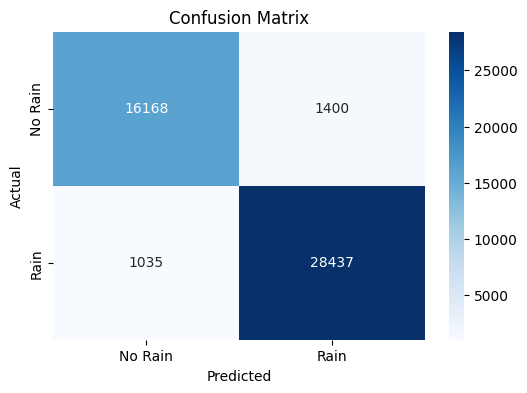

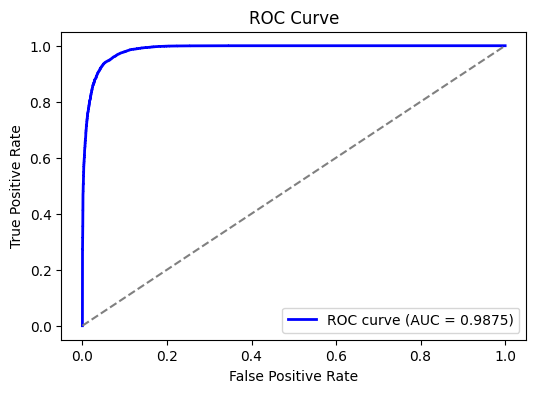

In [2]:
# ✅ Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
# ✅ Load dataset
df = pd.read_csv("/kaggle/input/thanjavur-dataset-new/updated_dataset .csv")  # Use your dataset

# ✅ Remove Missing Values
df.dropna(inplace=True)

# ✅ Remove Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# ✅ Define Features & Target (Remove highly correlated features)
X = df.drop(columns=["RainTomorrow", "T2MDEW", "RainToday"])  
y = df["RainTomorrow"]

# ✅ Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Train SVM Model (Linear Kernel)
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = svm_linear.predict(X_test)

# ✅ Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
g_mean = geometric_mean_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# ✅ Print Metrics
print(f"SVM (Linear) Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"G-Mean: {g_mean:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ ROC Curve
y_probs = svm_linear.decision_function(X_test)  # Get decision scores
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# WITH FEATURE SELECTION

✅ Selected Features: ['MO', 'T2M', 'T2M_MIN', 'PRECTOTCORR', 'PS']
SVM Accuracy After Feature Selection: 0.8198
Precision: 0.8300
Recall: 0.8958
F1-Score: 0.8616
G-Mean: 0.7875
ROC-AUC Score: 0.7940


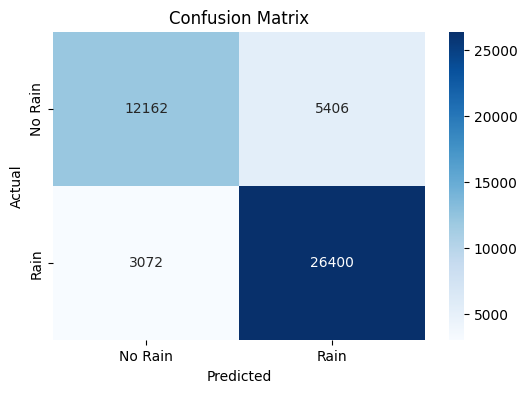

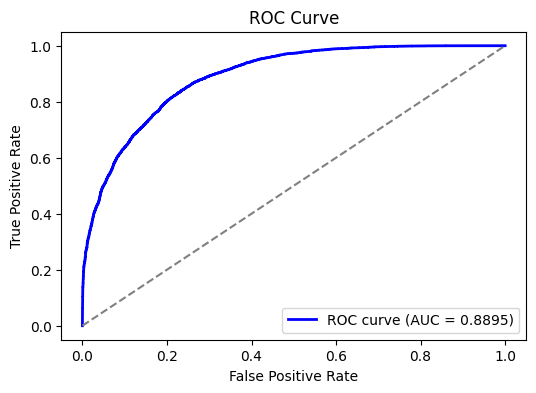

In [3]:
# ✅ Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ✅ Load dataset
df = pd.read_csv("/kaggle/input/thanjavur-dataset-new/updated_dataset .csv")  # Use your dataset

# ✅ Remove Missing Values
df.dropna(inplace=True)

# ✅ Remove Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# ✅ Define Features & Target
X = df.drop(columns=["RainTomorrow", "T2MDEW", "RainToday"])  
y = df["RainTomorrow"]

# ✅ Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Feature Selection (Top K Features)
k = 5  # Select top 5 features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# ✅ Get Selected Feature Names
selected_feature_names = X.columns[selector.get_support()]
print("✅ Selected Features:", list(selected_feature_names))

# ✅ Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Train SVM Model (Linear Kernel)
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = svm_linear.predict(X_test)

# ✅ Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
g_mean = geometric_mean_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# ✅ Print Metrics
print(f"SVM Accuracy After Feature Selection: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"G-Mean: {g_mean:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ ROC Curve
y_probs = svm_linear.decision_function(X_test)  # Get decision scores
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
